In [2]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(stats)
library(ggpubr)
library(dunn.test)

In [3]:
cadaver_5krare = readRDS("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/RDSfiles/all_cohorts_cadaver_5krare.rds")


### Alpha Diversity

In [4]:
Ita = subset_samples(cadaver_5krare, Location=="Italy")
Fin = subset_samples(cadaver_5krare, Location=="Finland")
USA = subset_samples(cadaver_5krare, Location=="USA")

Liver = subset_samples(cadaver_5krare, Organ=="Liver")

In [5]:
sample_tab = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/final_biom/all_cadaver_metadata.csv")
colnames(sample_tab)[1] <- "SampleID"

#### Italy

In [6]:
#By Organ

sha = estimate_richness(na.omit(Ita), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)

dfsha = merge(sha, sample_tab, on="SampleID")

ordsha = sha %>% group_by("Organ") %>%
    summarize(med.sha = median(Shannon)) %>%
    arrange(desc(med.sha)) %>%
    magrittr::extract2("Organ")

stats.sha = dfsha %>%
    group_by(Organ) %>%
    summarize(median = median(Shannon), 
              mean = mean(Shannon),
              sd = sd(Shannon),
              sem = sd(Shannon/sqrt(length(Shannon)))) #%>%
    #arrange(-desc(mean))
stats.sha

#CHECK FOR SIGNIFICANCE
stats.krusk = kruskal.test(Shannon~Organ, data=dfsha)
stats.krusk

#POST-HOC ANALYSIS
dunn = dunn.test(dfsha$Shannon, g=dfsha$Organ, method="bonferroni")
dunn

Organ,median,mean,sd,sem
Brain,1.527888,1.515707,0.2842694,0.08989389
Heart,1.225674,1.013399,0.6787137,0.22623791
Liver,1.569439,1.581582,0.4797023,0.13304549
Prostate,2.034755,2.456180,1.2397571,0.34384676
Spleen,1.474903,1.313862,0.7868781,0.24883269
Uterus,2.097697,2.378224,0.5901722,0.26393302



	Kruskal-Wallis rank sum test

data:  Shannon by Organ
Kruskal-Wallis chi-squared = 17.765, df = 5, p-value = 0.003255


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 17.7654, df = 5, p-value = 0


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |      Brain      Heart      Liver   Prostate     Spleen
---------+-------------------------------------------------------
   Heart |   1.170061
         |     1.0000
         |
   Liver |  -0.120423  -1.356595
         |     1.0000     1.0000
         |
Prostate |  -1.952959  -3.134163  -1.965176
         |     0.3812    0.0129*     0.3705
         |
  Spleen |   0.524951  -0.659111   0.678561   2.511098
         |     1.0000     1.0000     1.0000     0.0903
         |
  Uterus |  -2.247646  -3.170988  -2.243168  -0.778413  -2.676266
         |     0.1845    0.0114*     0.1866     1.0000     0.0558

alpha = 0.05
Reject Ho if p <= alpha/2


$chi2
[1] 17.76538

$Z
 [1]  1.1700616 -0.1204238 -1.3565952 -1.9529599 -3.1341638 -1.9651760
 [7]  0.5249512 -0.6591116  0.6785619  2.5110980 -2.2476460 -3.1709881
[13] -2.2431688 -0.7784130 -2.6762669

$P
 [1] 0.1209880860 0.4520737195 0.0874549336 0.0254121745 0.0008617231
 [6] 0.0246969345 0.2998085551 0.2549120425 0.2487077349 0.0060178137
[11] 0.0122993857 0.0007596070 0.0124429670 0.2181627770 0.0037223669

$P.adjusted
 [1] 1.00000000 1.00000000 1.00000000 0.38118262 0.01292585 0.37045402
 [7] 1.00000000 1.00000000 1.00000000 0.09026721 0.18449079 0.01139410
[13] 0.18664451 1.00000000 0.05583550

$comparisons
 [1] "Brain - Heart"     "Brain - Liver"     "Heart - Liver"    
 [4] "Brain - Prostate"  "Heart - Prostate"  "Liver - Prostate" 
 [7] "Brain - Spleen"    "Heart - Spleen"    "Liver - Spleen"   
[10] "Prostate - Spleen" "Brain - Uterus"    "Heart - Uterus"   
[13] "Liver - Uterus"    "Prostate - Uterus" "Spleen - Uterus"

In [7]:
#Sort by SI

avg <- aggregate(Shannon ~ Organ, data = dfsha, mean)
dfsha$Organ <-factor(dfsha$Organ, levels=avg[order(avg$Shannon), "Organ"])

Loading required package: viridisLite


png 
  2

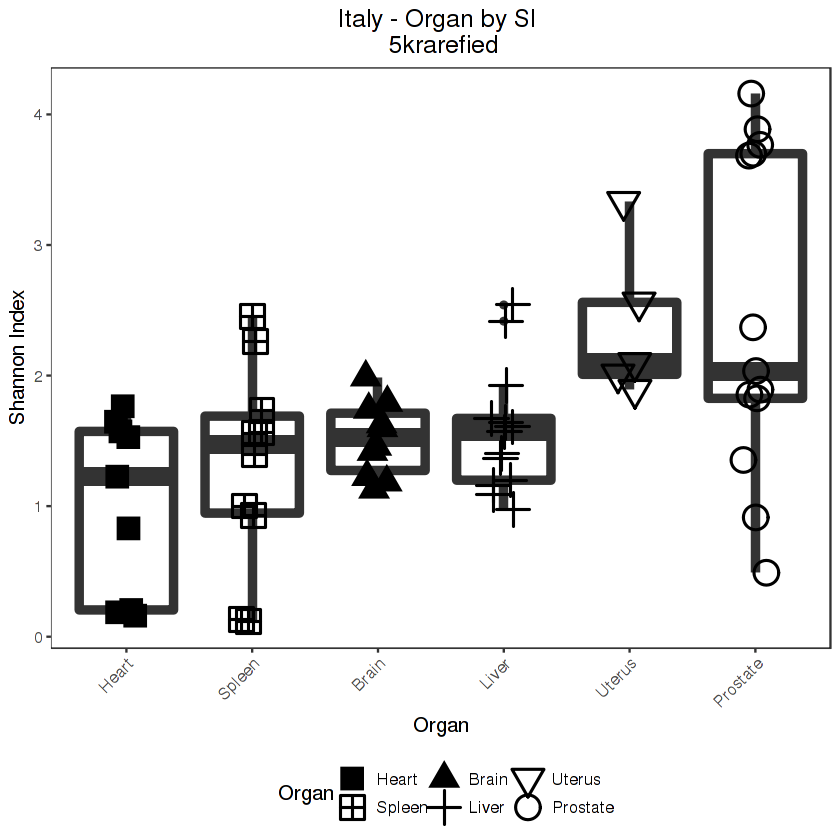

In [8]:
library(viridis)
p = ggplot(na.omit(dfsha), aes(x = Organ, y = Shannon)) + ggtitle("Italy - Organ by SI \n 5krarefied")

p = p + geom_boxplot(lwd=2) + ylab("Shannon Index")

p = p + geom_point(size = 6,alpha=1,stroke=1, aes(shape = Organ),
                   position = position_jitter(h = 0, w = 0.1)) +
                  scale_shape_manual(values=c(15,12,17,3,6,1))

p = p + theme_bw() + theme(text=element_text(size=12, color="black",family="Times New Roman"),
                           legend.key = element_blank(),
                           axis.text.x = element_text(angle = 45, hjust = 1),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "bottom",
                           #axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())

p
png('Italy_organ_shannon.png', width=10, height=10, units='in', res=300)
plot(p)
dev.off()

#### USA

In [9]:
#By Organ

sha = estimate_richness(na.omit(USA), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)

dfsha = merge(sha, sample_tab, on="SampleID")

ordsha = sha %>% group_by("Organ") %>%
    summarize(med.sha = median(Shannon)) %>%
    arrange(desc(med.sha)) %>%
    magrittr::extract2("Organ")

stats.sha = dfsha %>%
    group_by(Organ) %>%
    summarize(median = median(Shannon), 
              mean = mean(Shannon),
              sd = sd(Shannon),
              sem = sd(Shannon/sqrt(length(Shannon)))) #%>%
    #arrange(-desc(mean))
stats.sha

#CHECK FOR SIGNIFICANCE
stats.krusk = kruskal.test(Shannon~Organ, data=dfsha)
stats.krusk

#POST-HOC ANALYSIS
dunn = dunn.test(dfsha$Shannon, g=dfsha$Organ, method="bonferroni")
dunn

Organ,median,mean,sd,sem
Blood,1.5348721,1.4131166,0.8290353,0.3384522
Brain,0.5784634,1.4018919,1.4121313,0.4707104
Heart,0.2407065,0.8770226,1.2865635,0.3879135
Liver,2.5265422,2.1959796,1.4476107,0.2111557
Spleen,0.4207718,0.9710586,0.9808713,0.3101787



	Kruskal-Wallis rank sum test

data:  Shannon by Organ
Kruskal-Wallis chi-squared = 11.375, df = 4, p-value = 0.02266


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 11.3746, df = 4, p-value = 0.02


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |      Blood      Brain      Heart      Liver
---------+--------------------------------------------
   Brain |   0.004373
         |     1.0000
         |
   Heart |   0.779051   0.874545
         |     1.0000     1.0000
         |
   Liver |  -1.173137  -1.404113  -2.698881
         |     1.0000     0.8014     0.0348
         |
  Spleen |   0.559696   0.624028  -0.243419   2.290349
         |     1.0000     1.0000     1.0000     0.1100

alpha = 0.05
Reject Ho if p <= alpha/2


$chi2
[1] 11.3746

$Z
 [1]  0.004373113  0.779051469  0.874545032 -1.173137249 -1.404113109
 [6] -2.698881781  0.559696510  0.624028268 -0.243419324  2.290349710

$P
 [1] 0.498255386 0.217974698 0.190910754 0.120370386 0.080142585 0.003478644
 [7] 0.287843232 0.266304510 0.403840288 0.011000526

$P.adjusted
 [1] 1.00000000 1.00000000 1.00000000 1.00000000 0.80142585 0.03478644
 [7] 1.00000000 1.00000000 1.00000000 0.11000526

$comparisons
 [1] "Blood - Brain"  "Blood - Heart"  "Brain - Heart"  "Blood - Liver" 
 [5] "Brain - Liver"  "Heart - Liver"  "Blood - Spleen" "Brain - Spleen"
 [9] "Heart - Spleen" "Liver - Spleen"

In [10]:
#Sort by SI

avg <- aggregate(Shannon ~ Organ, data = dfsha, mean)
dfsha$Organ <-factor(dfsha$Organ, levels=avg[order(avg$Shannon), "Organ"])

png 
  2

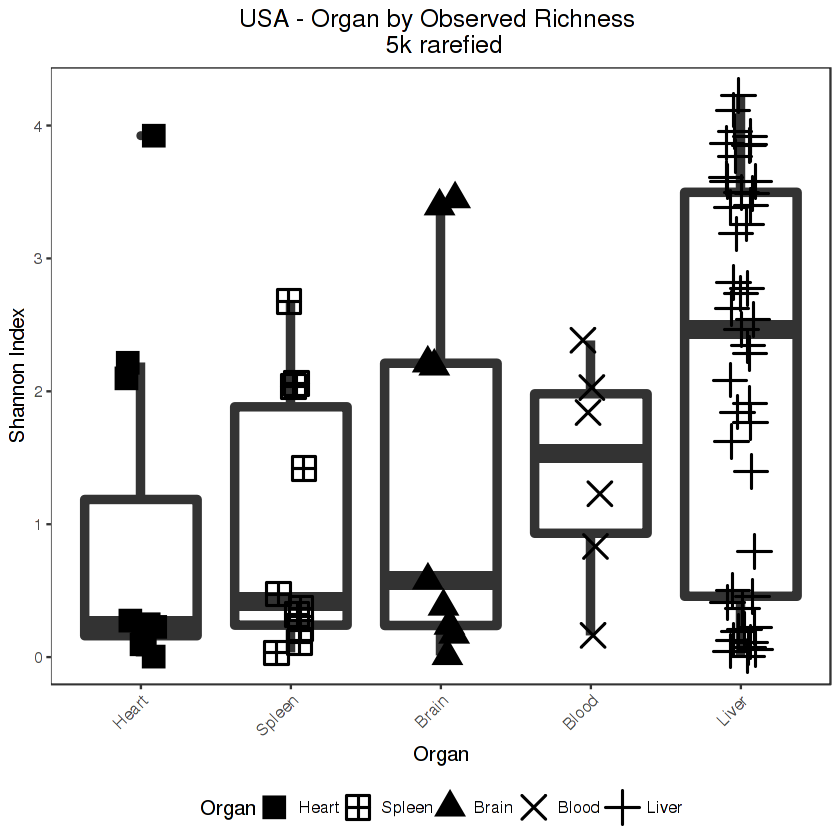

In [11]:
p = ggplot(na.omit(dfsha), aes(x = Organ, y = Shannon)) + ggtitle("USA - Organ by Observed Richness \n 5k rarefied")

p = p + geom_boxplot(lwd=2) + ylab("Shannon Index")

p = p + geom_point(size = 6,alpha=1,stroke=1, aes(shape = Organ),
                   position = position_jitter(h = 0, w = 0.1)) +
                   scale_shape_manual(values = c(15,12,17,4,3))

p = p + theme_bw() + theme(text=element_text(size=12, color="black",family="Times New Roman"),
                           legend.key = element_blank(),
                           axis.text.x = element_text(angle = 45, hjust = 1),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "bottom",
                           #axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())

p
png('USA_organ_shannon.png', width=10, height=10, units='in', res=300)
plot(p)
dev.off()

#### Liver Only (to inlude Finland)

In [47]:
#Liver only, all three locations (Finland, Italy, USA)

sha = estimate_richness(na.omit(Liver), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)

dfsha = merge(sha, sample_tab, on="SampleID")

ordsha = sha %>% group_by("Location") %>%
    summarize(med.sha = median(Shannon)) %>%
    arrange(desc(med.sha)) %>%
    magrittr::extract2("Location")

stats.sha = dfsha %>%
    group_by(Location) %>%
    summarize(median = median(Shannon), 
              mean = mean(Shannon),
              sd = sd(Shannon),
              sem = sd(Shannon/sqrt(length(Shannon)))) #%>%
    #arrange(-desc(mean))
stats.sha

#CHECK FOR SIGNIFICANCE
stats.krusk = kruskal.test(Shannon~Location, data=dfsha)
stats.krusk

#POST-HOC ANALYSIS
dunn = dunn.test(dfsha$Shannon, g=dfsha$Location, method="bonferroni")
dunn

Location,median,mean,sd,sem
Finland,0.4045755,0.5607272,0.4701119,0.1051202
Italy,1.5694395,1.5815818,0.4797023,0.1330455
USA,2.5265422,2.1959796,1.4476107,0.2111557



	Kruskal-Wallis rank sum test

data:  Shannon by Location
Kruskal-Wallis chi-squared = 20.479, df = 2, p-value = 3.574e-05


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 20.4787, df = 2, p-value = 0


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |    Finland      Italy
---------+----------------------
   Italy |  -2.634162
         |    0.0127*
         |
     USA |  -4.514946  -0.851816
         |    0.0000*     0.5915

alpha = 0.05
Reject Ho if p <= alpha/2


$chi2
[1] 20.47868

$Z
[1] -2.6341623 -4.5149469 -0.8518166

$P
[1] 4.217258e-03 3.166631e-06 1.971579e-01

$P.adjusted
[1] 1.265177e-02 9.499893e-06 5.914738e-01

$comparisons
[1] "Finland - Italy" "Finland - USA"   "Italy - USA"

In [48]:
#Sort by SI

avg <- aggregate(Shannon ~ Location, data = dfsha, mean)
dfsha$Location <-factor(dfsha$Location, levels=avg[order(avg$Shannon), "Location"])

png 
  2

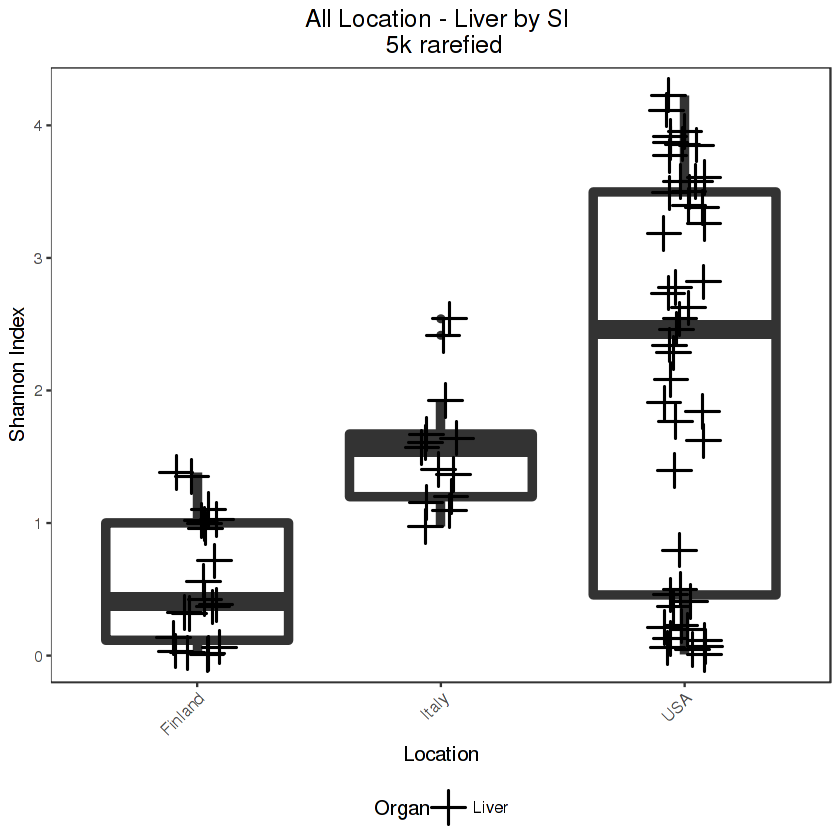

In [50]:
p = ggplot(na.omit(dfsha), aes(x = Location, y = Shannon)) + ggtitle("All Location - Liver by SI \n 5k rarefied")

p = p + geom_boxplot(lwd=2) + ylab("Shannon Index")

p = p + geom_point(size = 6,alpha=1,stroke=1, aes(shape = Organ),
                   position = position_jitter(h = 0, w = 0.1)) +
                   scale_shape_manual(values = c(3))
                                                

p = p + theme_bw() + theme(text=element_text(size=12, color="black",family="Times New Roman"),
                           legend.key = element_blank(),
                           axis.text.x = element_text(angle = 45, hjust = 1),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "bottom",
                           #axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())

p
png('All_liver_shannon.png', width=7.5, height=10, units='in', res=300)
plot(p)
dev.off()

### Rank Abundance and subsequent statistical analyses

In [23]:
head(cadaver.mdf)

X,OTU,Sample,Abundance,X.SampleID,BarcodeSequence,LinkerPrimerSequence,RTL_run,Case_no,Sex,...,bmi,bmi_category,Description,Rank1,Rank2,Rank3,Rank4,Rank5,Rank6,Rank7
301828,TACGTAGGGGGCTAGCGTTATCCGGAATTACTGGGCGTAAAGGGTGCGTAGGCGGTCTTTCAAGCCAGAAGTGAAAGGCTACGGCTCAACCGTAGTAAGCTTTTGGAACTGTAGGACTTGAGTGCAGGAGAGGAGAGTGGAATTCCTAGT,4522.C1Liver,0.9991667,4522.C1Liver,AAAACAAC,GTGCCAGCMGCCGCGGTAA,4522,C1,M,...,25.31,overweight,4522.C1_Liver,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Peptostreptococcaceae,g__,s__
156553,TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGCGCTTAACGTGGGAACTGCATTTGAAACTGGCAAGCTAGAGTCTTGTAGAGGGGGGTAGAATTCCAGG,4885.44Liver,0.9991332,4885.44Liver,AAAACAGA,GTGCCAGCMGCCGCGGTAA,4885,L630,F,...,45.90,obese,4885.44_Liver,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacteriales,f__Enterobacteriaceae,g__,s__
31705,TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACTGACTAGAGTATGGTAGAGGGTGGTGGAATTTCCTG,3813.35Heart,0.9986475,3813.35Heart,AAAACCTA,GTGCCAGCMGCCGCGGTAA,35,C38,F,...,15.85,underweight,3813.35_Heart,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Pseudomonadaceae,g__Pseudomonas,s__
31867,TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACTGACTAGAGTATGGTAGAGGGTGGTGGAATTTCCTG,3813.34Brain,0.9985421,3813.34Brain,AAAACCGT,GTGCCAGCMGCCGCGGTAA,34,C38,F,...,15.85,underweight,3813.34_Brain,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Pseudomonadaceae,g__Pseudomonas,s__
367357,TACGTAGGTGGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGCGCGTAGGCGGTTTTTTAAGTCTGATGTGAAAGCCCACGGCTCAACCGTGGAGGGTCATTGGAAACTGGAAAACTTGAGTGCAGAAGAGGAAAGTGGAATTCCATG,4885.5Liver,0.9983525,4885.5Liver,AAAACATG,GTGCCAGCMGCCGCGGTAA,4885,L641,M,...,28.65,overweight,4885.5_Liver,k__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Staphylococcaceae,g__Staphylococcus,s__
301887,TACGTAGGGGGCTAGCGTTATCCGGAATTACTGGGCGTAAAGGGTGCGTAGGCGGTCTTTCAAGCCAGAAGTGAAAGGCTACGGCTCAACCGTAGTAAGCTTTTGGAACTGTAGGACTTGAGTGCAGGAGAGGAGAGTGGAATTCCTAGT,3813.27Spleen,0.9975804,3813.27Spleen,AAAACCAT,GTGCCAGCMGCCGCGGTAA,27,C29,M,...,24.78,normal,3813.27_Spleen,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Peptostreptococcaceae,g__,s__


In [21]:
cadaver.mdf = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/MDFfiles/cadaver.mdf.csv")

In [40]:
N = 10

topN = cadaver.mdf %>%
    group_by(OTU) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(OTU) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("OTU")

mdf.other = cadaver.mdf %>%
    mutate(OTU.other = ifelse(OTU %in% topN, as.character(OTU), "Other")) %>%
    group_by(Sample,Organ, OTU.other) %>%
    summarize(Abundance = mean(Abundance)) %>%
    arrange(Abundance)

mdf.summary = mdf.other %>%
    group_by(Organ, OTU.other) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd/sqrt(length(Abundance)),
              proportion = round(avg*100,2)) %>%
    arrange((OTU.other))

Selecting by m


In [27]:
tax = tax_table(cadaver)

In [41]:
write.csv(mdf.summary, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/rank_abundance/cadaver.mdf.top10_OTU.byorgan.summary.csv")
write.csv(mdf.other, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/rank_abundance/cadaver.mdf.top10_OTU.byorgan.other.csv")
write.csv(tax, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/rank_abundance/cadaver.complete.taxtable.csv" )

#### USA - Clostridiales

In [16]:
usa = subset_samples(cadaver, Location=="USA")
usa.clostridia = subset_taxa(usa, Rank4=="o__Clostridiales")